In [2]:
import math
import tensorflow as tf
from random import random, choice
import numpy
import numpy as np
import numpy.matlib
from matplotlib import cm


import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook  

from mpl_toolkits.mplot3d import Axes3D

In [3]:
def makeTraining(n = 1000):

    trainingData = []
    trainingLabels = []
    

    for i in range(n):
        
        radius = choice([1,2])
        theta = random() * 2 * math.pi
        
        point = [radius * math.cos(theta), radius * math.sin(theta) ]
        if radius == 1:
            label = [1,0]
        else:
            label = [0,1]
            
        trainingData.append(point)
        trainingLabels.append(label)
                

    return trainingData, trainingLabels

In [4]:
x = tf.placeholder(tf.float32, [None, 2]) #input 28x28 array of pixels

# trying to learn W and b
W1 = tf.Variable(tf.random_uniform([2, 3])) # "weights" 10 linear combos of the input -> 10 different numbers given an input
offset1 = tf.Variable(tf.random_uniform([3])) # offset for the "weights"
W2 = tf.Variable(tf.random_uniform([3, 2])) # "weights" 10 linear combos of the input -> 10 different numbers given an input

a0 = tf.nn.relu(tf.add(tf.matmul(x, W1), offset1))
a1 = tf.nn.relu(tf.matmul(a0, W2)) # the output

y = a1

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 2]) #true output


# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()


# Train

for i in range(1000):
    batch_xs, batch_ys = makeTraining()
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [5]:
# Get network from tensorflow

m1 = numpy.transpose(W1.eval())
b = numpy.transpose(offset1.eval())
m2 = numpy.transpose(W2.eval())

In [6]:
# create inputs
grid = 15

x = numpy.linspace(-2, 2, grid)
y = numpy.linspace(-2, 2, grid)
grid_size = x[1]-x[0]
circle_mesh_x, circle_mesh_y = numpy.meshgrid(x, y)
Z = np.zeros((grid,grid))
for i in range(grid):
    for j in range(grid):
        Z[i,j] = (circle_mesh_x[i,j]+0.5*grid_size)**2 + (circle_mesh_y+0.5*grid_size)[i,j]**2

N = Z/Z.max() # for colors

mesh = [circle_mesh_x.reshape(grid**2), circle_mesh_y.reshape(grid**2)]
        

In [7]:
# run the inputs through the first layer

output_mesh = [mesh[0], mesh[1], np.zeros((grid,grid))]
#output_mesh = tf.nn.relu(numpy.matmul(m1,mesh) + numpy.transpose(numpy.matlib.repmat(b, 100, 1))).eval() # first layer


# Input Layer

<IPython.core.display.Javascript object>


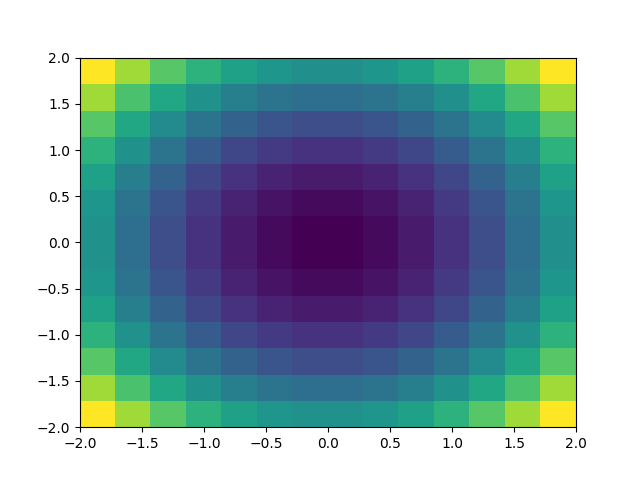

In [8]:
# initialize plot

%matplotlib notebook
fig = plt.figure()

In [9]:
# run plot
plt.pcolor(circle_mesh_x, circle_mesh_y, N, edgecolors='none')
plt.show()

# Layer 1

In [10]:
# run the inputs through the first layer
# output_mesh = tf.nn.relu(numpy.matmul(m1,mesh) + numpy.transpose(numpy.matlib.repmat(b, 100, 1))).eval() # first layer

output_mesh0 = output_mesh
output_mesh1 = numpy.matmul(m1,mesh)
output_mesh2 = output_mesh1 + numpy.transpose(numpy.matlib.repmat(b, grid**2, 1))
output_mesh3 = tf.nn.relu(output_mesh2).eval()



<IPython.core.display.Javascript object>


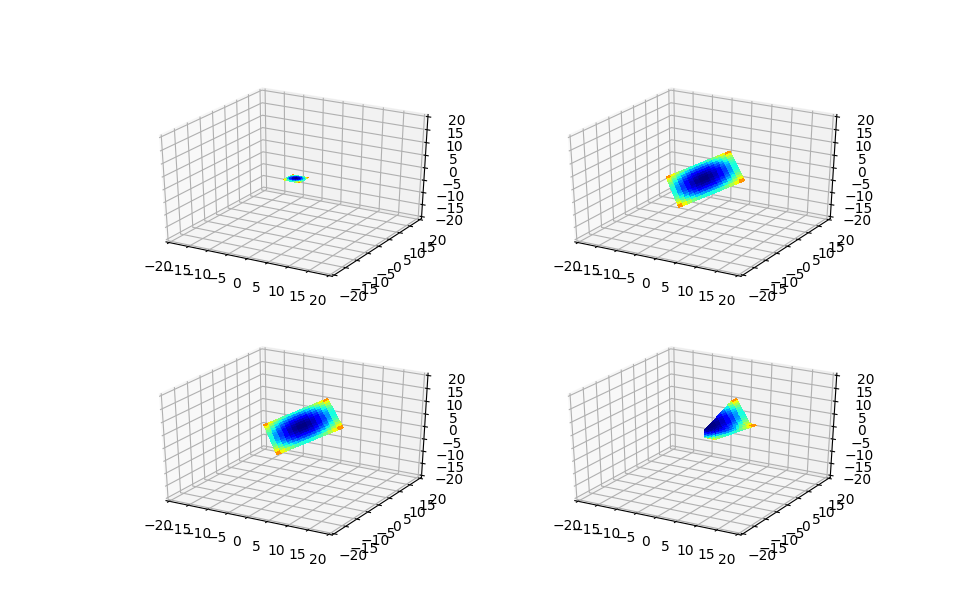

In [15]:
# initialize plot

%matplotlib notebook
fig2 = plt.figure(figsize=plt.figaspect(0.7))


In [16]:
# run plot
ax = fig2.add_subplot(221, projection='3d')
surf = ax.plot_surface(output_mesh0[0].reshape(grid,grid),output_mesh0[1].reshape(grid,grid), output_mesh0[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)


ax1 = fig2.add_subplot(222, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax1.plot_surface(output_mesh1[0].reshape(grid,grid),output_mesh1[1].reshape(grid,grid), output_mesh1[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax2 = fig2.add_subplot(223, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax2.plot_surface(output_mesh2[0].reshape(grid,grid),output_mesh2[1].reshape(grid,grid), output_mesh2[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax3 = fig2.add_subplot(224, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax3.plot_surface(output_mesh3[0].reshape(grid,grid),output_mesh3[1].reshape(grid,grid), output_mesh3[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax_limits = 20
ax.set_xlim([-ax_limits,ax_limits])
ax.set_ylim([-ax_limits,ax_limits])
ax.set_zlim([-ax_limits,ax_limits])

plt.show()

# Output Layer

In [25]:
output_mesh4 = numpy.matmul(m2,output_mesh3)
#output_mesh5 = [tf.nn.softmax([output_mesh4[0][i],output_mesh4[1][i]]).eval()[0] for i in range(grid**2)]
output_mesh5 = [[np.exp(output_mesh4[0][i])/(np.exp(output_mesh4[0][i]) + np.exp(output_mesh4[1][i])) for i in range(grid**2)], [np.exp(output_mesh4[1][i])/(np.exp(output_mesh4[0][i]) + np.exp(output_mesh4[1][i])) for i in range(grid**2)]]
output_mesh5 = np.array(output_mesh5)

<IPython.core.display.Javascript object>


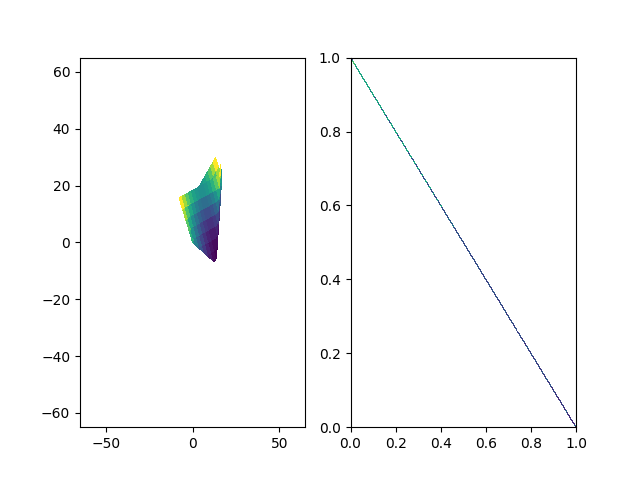

In [26]:
# initialize plot

%matplotlib notebook
fig3 = plt.figure()

In [27]:
# run plot
ax4 = fig3.add_subplot(121)
surf = ax4.pcolor(output_mesh4[0].reshape(grid, grid), output_mesh4[1].reshape(grid, grid),N)#, N, edgecolors='none')

ax5 = fig3.add_subplot(122)
surf = ax5.pcolor(output_mesh5[0].reshape(grid, grid), output_mesh5[1].reshape(grid, grid), N, edgecolors='none')

ax4.set_xlim([-65,65])
ax4.set_ylim([-65,65])

plt.show()

<IPython.core.display.Javascript object>


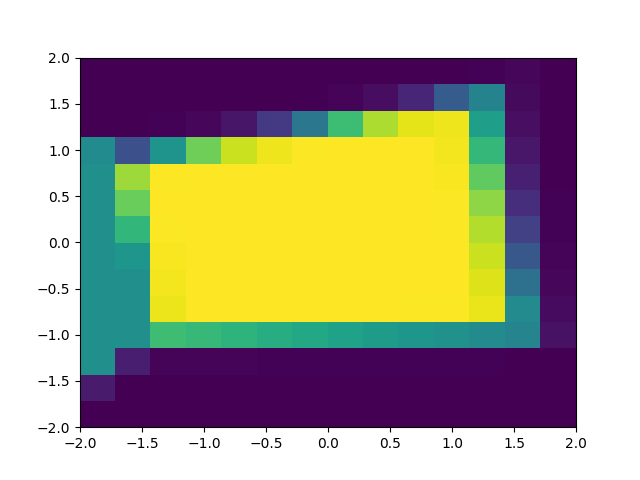

In [29]:
# initialize plot

%matplotlib notebook
fig4 = plt.figure()

In [30]:
ax = fig4.add_subplot(111)
surf = ax.pcolor(circle_mesh_x, circle_mesh_y,output_mesh5[0].reshape(grid,grid))#, N, edgecolors='none')
cbar = fig.colorbar(surf, ticks=[-1, 0, 1])